# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

In [7]:
data = pd.read_csv("PS_20174392719_1491204439457_log.csv").sample(n = 100000)
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
950239,44,PAYMENT,1559.39,C1737204915,116107.00,114547.61,M1548885470,0.00,0.00,0,0
2240105,186,CASH_IN,21871.49,C1215175572,2024382.99,2046254.48,C882374491,131508.96,109637.47,0,0
4738923,332,PAYMENT,11002.45,C732301127,6685.00,0.00,M947180884,0.00,0.00,0,0
6320054,687,PAYMENT,14814.27,C1890604786,3392.00,0.00,M163361388,0.00,0.00,0,0
904025,43,CASH_IN,23425.12,C1621954591,16789677.68,16813102.79,C501173125,625787.27,602362.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4760184,334,PAYMENT,24708.39,C702014193,0.00,0.00,M1382014603,0.00,0.00,0,0
1795150,162,CASH_IN,130243.71,C1569597388,50311.00,180554.71,C2036782938,184535.14,54291.43,0,0
4024354,299,CASH_IN,77891.34,C841256644,45634.00,123525.34,C272513686,1565308.07,1487416.73,0,0
1241644,134,CASH_OUT,100795.34,C685529739,177373.76,76578.41,C1831512617,335859.04,436654.38,0,0


In [9]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.00000,100000.0
mean,243.600210,1.788609e+05,8.358504e+05,8.567292e+05,1.096933e+06,1.218947e+06,0.00131,0.0
std,142.561539,5.964622e+05,2.873248e+06,2.909633e+06,3.332727e+06,3.579175e+06,0.03617,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
25%,156.000000,1.338920e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
50%,238.000000,7.443640e+04,1.405767e+04,0.000000e+00,1.317947e+05,2.118752e+05,0.00000,0.0
75%,335.000000,2.084491e+05,1.074788e+05,1.435545e+05,9.394442e+05,1.106856e+06,0.00000,0.0
max,742.000000,5.625500e+07,3.893942e+07,3.894623e+07,2.580347e+08,2.582821e+08,1.00000,0.0


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >]],
      dtype=object)

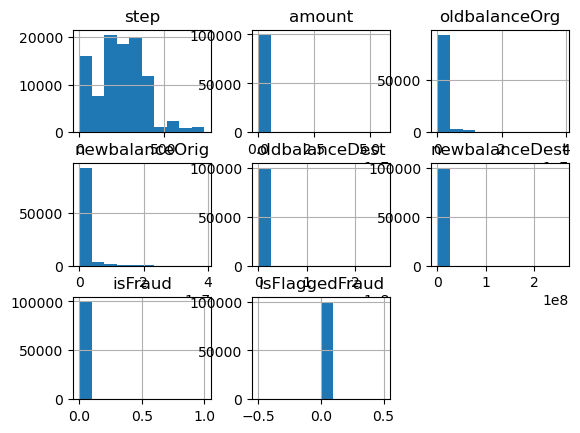

In [20]:
data.hist()


### What is the distribution of the outcome? 

(array([99869.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   131.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

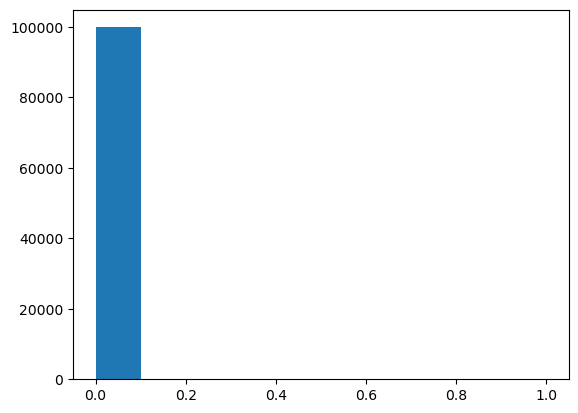

In [21]:
plt.hist(data["isFraud"])

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [22]:
data.dtypes


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### Run a logisitc regression classifier and evaluate its accuracy.

In [37]:

features = data[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest","newbalanceDest"]]

#features = data.drop("type", "isFruad", axis =1)

target = data["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20)


#X = data[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest","newbalanceDest"]]
#X = data.drop("type", axis =1)

#y = data["isFraud"]

# sometimes its easier to use linear regression so people(CEO) can better understand it

reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.22291581487489165

### Now pick a model of your choice and evaluate its accuracy.

In [38]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 3)   

model.fit(X_train, y_train)

print(f"Test data accuracy was {model.score(X_test, y_test)}")
print(f"Training data accuracy was {model.score(X_train, y_train)}")

Test data accuracy was 0.9994
Training data accuracy was 0.99895


In [40]:

train = pd.concat([X_train, y_train], axis = 1)

no_fraud = train[train["isFraud"] == 0]
yes_fraud = train[train["isFraud"] == 1]

print(no_fraud.shape)
print(yes_fraud.shape)

(79888, 6)
(112, 6)


In [48]:
yes_fraud_oversampled = resample(yes_fraud,      # oversample from here
                                   replace = True,     # need replacement, since we do not have enough data from the minority class
                                   n_samples = len(no_fraud),  #equals the lenght of the other group
                                   random_state = 0)

train_oversampled = pd.concat([no_fraud, yes_fraud_oversampled], axis = 0)

X_train_over = train_oversampled.drop("isFraud", axis = 1)
y_train_over = train_oversampled["isFraud"]

model = LogisticRegression(max_iter=1000)
model.fit(X_train_over, y_train_over)
model.score(X_test, y_test)


0.9599

### Which model worked better and how do you know?

In [2]:
# tree classifeir works better, but too good.
# tried to oversampling and it seems more accurate

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.